<font size=7> Latencies Analysis

In [18]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, plot_latency_dist_hist, plot_latency_angle_hist, \
                                 plot_cross_sttc_pairs, latencies
from human_hip.animate import animate_latencies
import human_hip.spike_data as spike_data

In [19]:
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, cross_sttc, plot_pair_analysis, plot_cross_sttc_pairs
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import numpy as np
import pickle
from ipywidgets import interact_manual, interact

In [20]:
with open("/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/curated_base_acqm.pkl", "rb") as filename:
    sd = pickle.load(filename)

In [21]:
sttc_delta=20
sttc_cutoff = -1

print(sd.N**2 , "Starting Pairs")
sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix   
pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
for i in range(sd.N):
    for j in range(i+1,sd.N):
        if sttc_neo[i,j] > sttc_cutoff:
            pairs.append([i,j])
print( len(pairs), "pairs above sttc cutoff")

all_pair_latencies = []
#pairs_late = [] #lags_late = []
count = 0
for pair in pairs:
    count += 1
    if count % 1000 == 0:
        print(count)
    pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=150)  #latency= np.median(pair_latencies)
    #if abs(np.median(pair_latencies))> latency_cutoff:
    #    pairs_late.append( pair )  #lags_late.append( latency )
    all_pair_latencies.append( pair_latencies )

62001 Starting Pairs


30876 pairs above sttc cutoff
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [22]:
# # dump all_pair_latencies into pickle file
# with open("all_pair_latencies_150ms.pkl", "wb") as filename:
#     pickle.dump(all_pair_latencies, filename)

In [23]:
#curated_latencies = []
curated_pairs = []
len_all_pair_latencies = []
for i in range(len(all_pair_latencies)):
    len_all_pair_latencies.append(len(all_pair_latencies[i]))
#curated_pairs.append( pairs[i] )

(array([6.685e+03, 3.214e+03, 2.135e+03, 1.275e+03, 1.209e+03, 8.680e+02,
        7.850e+02, 6.600e+02, 6.290e+02, 5.730e+02, 6.180e+02, 6.990e+02,
        5.800e+02, 5.530e+02, 5.170e+02, 4.720e+02, 4.420e+02, 5.050e+02,
        4.990e+02, 5.200e+02, 4.290e+02, 4.570e+02, 4.850e+02, 5.560e+02,
        4.950e+02, 4.640e+02, 4.600e+02, 4.610e+02, 3.350e+02, 3.040e+02,
        2.480e+02, 2.190e+02, 3.060e+02, 1.920e+02, 1.340e+02, 1.660e+02,
        1.270e+02, 1.270e+02, 1.600e+02, 1.210e+02, 1.390e+02, 1.240e+02,
        1.380e+02, 9.800e+01, 8.800e+01, 5.600e+01, 2.800e+01, 2.100e+01,
        4.000e+01, 4.700e+01, 2.200e+01, 1.000e+01, 2.200e+01, 2.200e+01,
        3.100e+01, 2.700e+01, 4.400e+01, 1.400e+01, 1.400e+01, 2.500e+01,
        1.500e+01, 2.500e+01, 1.900e+01, 2.300e+01, 1.800e+01, 1.700e+01,
        1.500e+01, 6.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+0

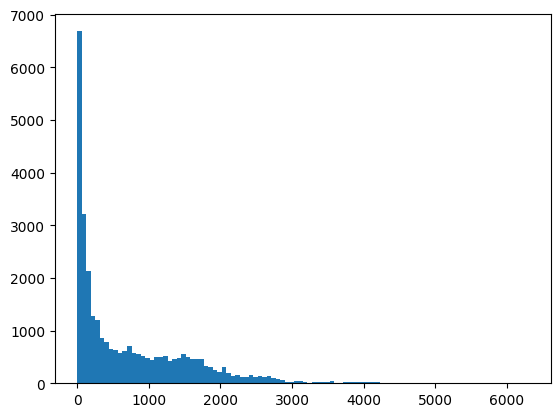

In [24]:
plt.hist(len_all_pair_latencies, bins=100)

In [9]:
sttc_delta=20
sttc_cutoff = 0.04

In [10]:
# load the file all_pair_latencies_150ms.pkl
with open("all_pair_latencies_150ms.pkl", "rb") as f:
    all_pair_latencies = pickle.load(f)

In [12]:
print(sd.N**2 , "Starting Pairs")
sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix   
pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
for i in range(sd.N):
    for j in range(i+1,sd.N):
        if sttc_neo[i,j] > sttc_cutoff:
            pairs.append([i,j])
print( len(pairs), "pairs above sttc cutoff")

44944 Starting Pairs


11079 pairs above sttc cutoff


In [20]:
# Get all latencies whose median latency is above some minimum Latency Cuttoff
all_pair_latencies = []
#pairs_late = [] #lags_late = []
count = 0
for pair in pairs:
    count += 1
    if count % 1000 == 0:
        print(count)
    pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=150)  #latency= np.median(pair_latencies)
    #if abs(np.median(pair_latencies))> latency_cutoff:
    #    pairs_late.append( pair )  #lags_late.append( latency )
    all_pair_latencies.append( pair_latencies )
#pairs= pairs_late
#print( len(pairs_late), "pairs above latencency cutoff")


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [31]:
curated_latencies = []
curated_pairs = []
for i in range(len(all_pair_latencies)):
    pair_latencies = all_pair_latencies[i]
    if abs(np.mean(pair_latencies))> 15 and len(pair_latencies)>200: #abs(np.median(pair_latencies))> 1.5 and 
        if np.mean(pair_latencies) < 0:
            curated_pairs.append( pairs[i] )  #lags_late.append( latency )
            curated_latencies.append( pair_latencies )
        else:
            curated_pairs.append( [ pairs[i][1], pairs[i][0] ] ) 
            curated_latencies.append( pair_latencies )
#curated_pairs.append( pairs[i] )
print(len(curated_latencies))
curated_pairs = np.array(curated_pairs)

11


/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


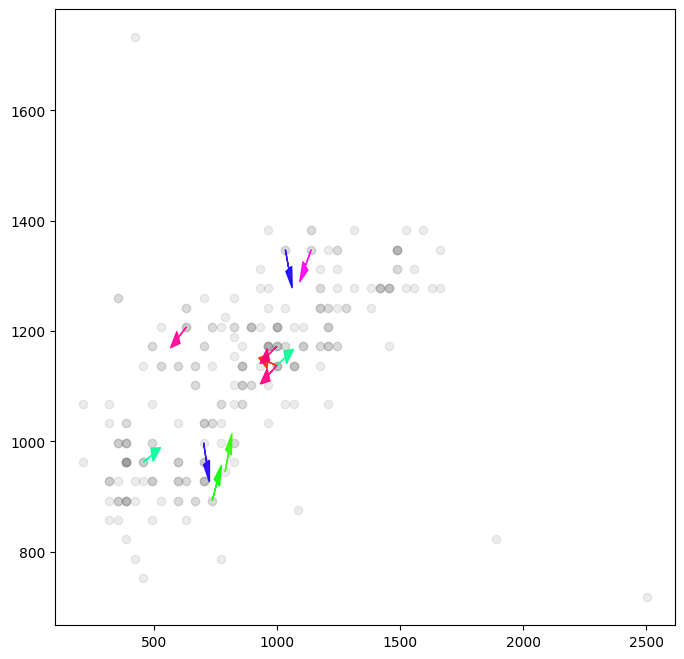

In [32]:
plot_vector_layout( sd, curated_pairs  )

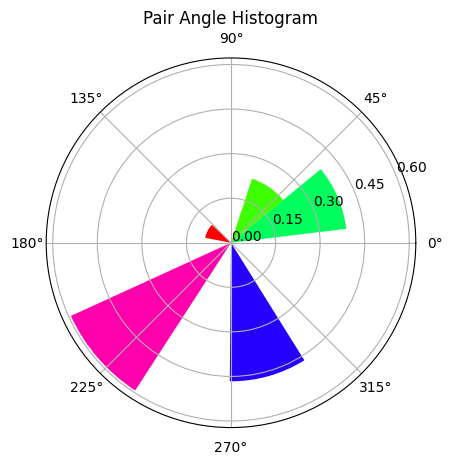

In [33]:
plot_latency_angle_hist( sd, curated_pairs, by_firing_rate=True)

In [34]:
def pairs_hisogram(pairs, sd, ms_cutoff_high=150):
    @interact
    def plot_pair(pair = (0, len(pairs)-1) ):
        latencies_pair = latencies( pairs[pair,0], pairs[pair,1], sd, ms_cutoff_high=150  )
        plt.xlim(-ms_cutoff_high, ms_cutoff_high)
        plt.hist(latencies_pair, bins=12)

In [35]:
pairs_hisogram( curated_pairs, sd, ms_cutoff_high=150)

interactive(children=(IntSlider(value=5, description='pair', max=10), Output()), _dom_classes=('widget-interac…